In [18]:
import sys, os
import numpy as np
import time, h5py
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import default_paths, nsd_utils, coco_utils
from model_fitting import initialize_fitting 
import argparse
import pandas as pd
import matplotlib

In [61]:
import torch


False

In [49]:
subject=1
which_prf_grid=5;
prf_model_index=600;


number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


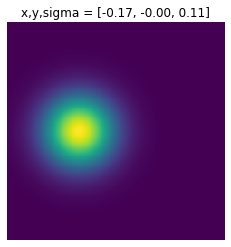

In [50]:
import matplotlib.pyplot as plt
from utils import prf_utils
which_prf_grid=5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)
mm = prf_model_index

x,y,sigma = models[mm,:]
n_pix = 240
prf_2d = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix)

plt.figure();
plt.pcolormesh(prf_2d)
plt.axis('off')
plt.axis('square')
plt.gca().invert_yaxis()
plt.title('x,y,sigma = [%.2f, %.2f, %.2f]'%(x,y,sigma));

In [51]:
ims2use = np.arange(0,10000)
image_data = nsd_utils.get_image_data(subject)
image_data = nsd_utils.image_uncolorize_fn(image_data)
image_data = image_data[ims2use,:,:,:]
n_images = image_data.shape[0]


Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


In [52]:
labels_folder = os.path.join(default_paths.stim_labels_root, 'S%d_within_prf_grid%d'%(subject, \
                                                                                        which_prf_grid))

fn2load = os.path.join(labels_folder, 'S%d_natural_humanmade_prf%d.csv'%(subject, prf_model_index))
nat_hum_df = pd.read_csv(fn2load, index_col=0)
nat_hum = np.array(nat_hum_df)

fn2load = os.path.join(labels_folder, 'S%d_cocolabs_binary_prf%d.csv'%(subject, prf_model_index))
coco_df = pd.read_csv(fn2load, index_col=0)
cat_labels = np.array(coco_df)[:,12:92]

fn2load = os.path.join(labels_folder, 'S%d_cocolabs_stuff_binary_prf%d.csv'%(subject, prf_model_index))
coco_stuff_df = pd.read_csv(fn2load, index_col=0)
stuff_cat_labels = np.array(coco_stuff_df)[:,16:108]



In [53]:
cat_objects, cat_names, cat_ids, supcat_names, ids_each_supcat = \
                coco_utils.get_coco_cat_info(coco_utils.coco_val)

stuff_cat_objects, stuff_cat_names, stuff_cat_ids, stuff_supcat_names, stuff_ids_each_supcat = \
        coco_utils.get_coco_cat_info(coco_utils.coco_stuff_val) 



image 0 has:
['zebra']
['grass', 'other']

image 1 has:
['person', 'truck']
['dirt', 'hill', 'straw', 'other']

image 2 has:
['banana', 'orange', 'dining table']
['other']

image 3 has:
['person', 'frisbee']
['sky-other', 'other']


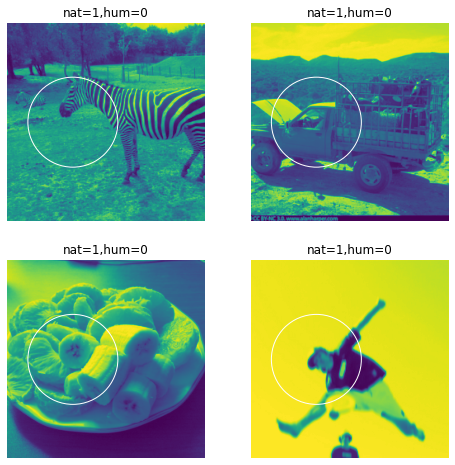

In [54]:
# plot examples - "natural" objects

ims2use = np.where((nat_hum[:,0]==1) & (nat_hum[:,1]==0))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('nat=%d,hum=%d'%(nat_hum[im,0], nat_hum[im,1]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
    print([stuff_cat_names[cc] for cc in range(len(stuff_cat_names)) if stuff_cat_labels[im,cc]==1])


image 0 has:
['person']
['cage', 'clothes', 'ground-other', 'other']

image 1 has:
['bed']
['light', 'table', 'wall-other', 'other']

image 2 has:
['clock']
['bridge', 'clouds', 'other']

image 3 has:
['person']
['ceiling-other', 'wall-brick', 'other']


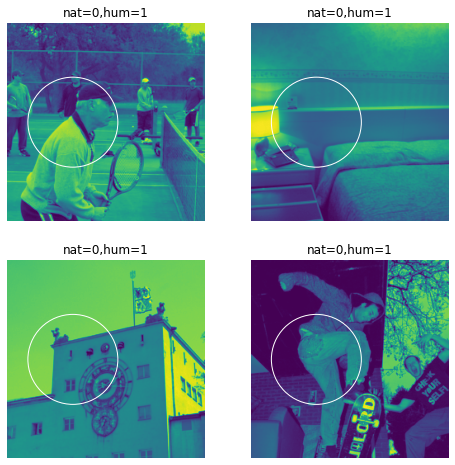

In [55]:
# plot examples - "human-made" objects

ims2use = np.where((nat_hum[:,0]==0) & (nat_hum[:,1]==1))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('nat=%d,hum=%d'%(nat_hum[im,0], nat_hum[im,1]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
    print([stuff_cat_names[cc] for cc in range(len(stuff_cat_names)) if stuff_cat_labels[im,cc]==1])


image 0 has:
['person', 'potted plant']
['bush', 'clothes', 'fence', 'plant-other', 'table', 'tree', 'wall-brick', 'wall-concrete', 'other']

image 1 has:
['bench', 'dining table']
['flower', 'moss', 'other']

image 2 has:
['person', 'cake']
['door-stuff', 'other']

image 3 has:
['umbrella']
['tree', 'other']


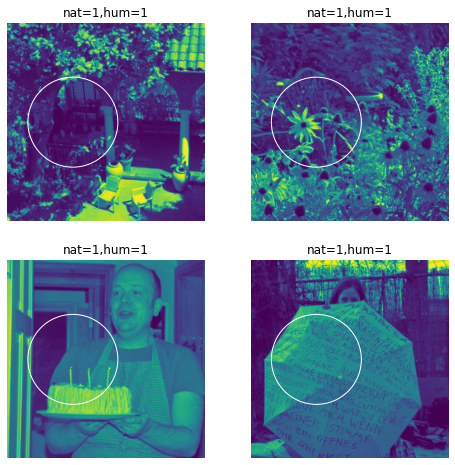

In [56]:
# plot examples - "ambiguous" objects

ims2use = np.where((nat_hum[:,0]==1) & (nat_hum[:,1]==1))[0]

images2plot = np.random.choice(ims2use,4);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(2,2,ii+1);
    plt.imshow(image_data[im,0,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('nat=%d,hum=%d'%(nat_hum[im,0], nat_hum[im,1]))
    print('\nimage %d has:'%ii)
    print([cat_names[cc] for cc in range(len(cat_names)) if cat_labels[im,cc]==1])
    print([stuff_cat_names[cc] for cc in range(len(stuff_cat_names)) if stuff_cat_labels[im,cc]==1])